C:\Users\lisov\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.48984e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\lisov\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.2633e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


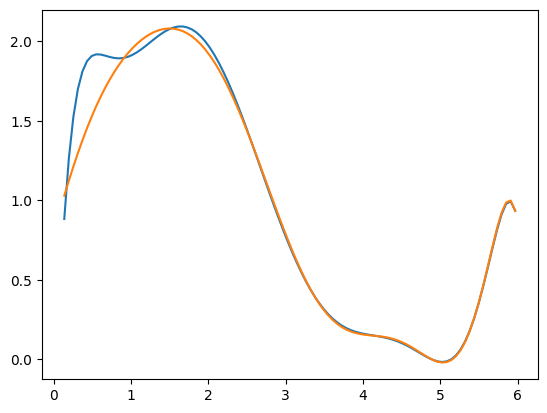

In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline
data = pd.read_csv('F:/DATA SCIENCE/[Skillbox] Профессия‌ ‌Data‌ ‌Scientist‌ (2020)/1 Data Scientist. ML. Начальный уровень/03/non_linear.csv')
data.head()

def generate_degrees(source_data: list, degree: int):

    return np.array([
        source_data**n for n in range(1, degree + 1)
    ]).T

from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=0.01)

model_linear = Ridge(alpha=0.0)
degree = 10

X = generate_degrees(data.x_train, degree)
y = data.y_train.values
#обучение моделей
model_ridge.fit(X, y)
model_linear.fit(X, y)
x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num = 100)
y_linspace_linear = model_linear.predict(generate_degrees(x_linspace, degree))
y_linspace_ridge = model_ridge.predict(generate_degrees(x_linspace, degree))

plt.plot(x_linspace, y_linspace_linear)
plt.plot(x_linspace, y_linspace_ridge)
plt.show()

In [31]:
print("Норма вектора весов Ridge \t||w|| = %.2f" % (norm(model_ridge.coef_)))
print("Норма вектора весов Linear \t||w|| = %.2f" % (norm(model_linear.coef_)))

Норма вектора весов Ridge 	||w|| = 1.94
Норма вектора весов Linear 	||w|| = 72.37


In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=23)

print(X_train.shape, X_valid.shape)

(40, 10) (10, 10)


In [33]:
alphas = [0.1, 0.15, 0.35, 0.5, 0.8]

best_alpha = alphas[0]
best_rmse = np.infty

for alpha in alphas:
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train, y_train)
    y_pred = model_ridge.predict(X_valid)
    error = mean_squared_error(y_valid, y_pred)
    if error < best_rmse:
        best_rmse = error
        best_alpha = alpha
    print("alpha=%.2f Ошибка %.2f" % (alpha, error))
print('\n-------\nЛучшая модель alpha=%.2f с ошибкой RMSE=%.5f\n-------' % (best_alpha, best_rmse) )  
    

alpha=0.10 Ошибка 0.09
alpha=0.15 Ошибка 0.09
alpha=0.35 Ошибка 0.08
alpha=0.50 Ошибка 0.08
alpha=0.80 Ошибка 0.08

-------
Лучшая модель alpha=0.80 с ошибкой RMSE=0.08013
-------


C:\Users\lisov\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.87336e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\lisov\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.5446e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\lisov\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.01675e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\lisov\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.83799e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\lisov\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:211: Lin